In [1]:
%matplotlib inline
import numpy as np
import scipy.stats as scs
import scipy.stats.mstats as scsms
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
from matplotlib.pylab import *
import matplotlib.cm as cm

In [100]:
dado_v = np.array([[81,77,103,112,123,19,40,111,114,120],[82,61,110,121,119,77,52,111,117,124],[82,74,97,105,112,91,73,115,118,129],[88,70,103,111,122,64,84,105,113,123],[89,88,94,110,116,108,73,107,118,127],[77,82,86,101,109,113,79,102,120,121],[74,80,85,90,97,101,96,72,128,130],[75,80,83,87,94,99,95,48,139,145],[77,84,74,108,121,143,91,52,136,144],[87,100,47,111,124,109,0,98,134,144]],float)


print dado_v
print ""

dx = shape(dado_v)[0]
dy = shape(dado_v)[1]



[[  81.   77.  103.  112.  123.   19.   40.  111.  114.  120.]
 [  82.   61.  110.  121.  119.   77.   52.  111.  117.  124.]
 [  82.   74.   97.  105.  112.   91.   73.  115.  118.  129.]
 [  88.   70.  103.  111.  122.   64.   84.  105.  113.  123.]
 [  89.   88.   94.  110.  116.  108.   73.  107.  118.  127.]
 [  77.   82.   86.  101.  109.  113.   79.  102.  120.  121.]
 [  74.   80.   85.   90.   97.  101.   96.   72.  128.  130.]
 [  75.   80.   83.   87.   94.   99.   95.   48.  139.  145.]
 [  77.   84.   74.  108.  121.  143.   91.   52.  136.  144.]
 [  87.  100.   47.  111.  124.  109.    0.   98.  134.  144.]]



[[  81.   77.  103.  112.  123.   19.   40.  111.  114.  120.]
 [  82.   61.  110.  121.  119.   77.   52.  111.  117.  124.]
 [  82.   74.   97.  105.  112.   91.   73.  115.  118.  129.]
 [  88.   70.  103.  111.  122.   64.   84.  105.  113.  123.]
 [  89.   88.   94.  110.  116.  108.   73.  107.  118.  127.]
 [  77.   82.   86.  101.  109.  113.   79.  102.  120.  121.]
 [  74.   80.   85.   90.   97.  101.   96.   72.  128.  130.]
 [  75.   80.   83.   87.   94.   99.   95.   48.  139.  145.]
 [  77.   84.   74.  108.  121.  143.   91.   52.  136.  144.]
 [  87.  100.   47.  111.  124.  109.    0.   98.  134.  144.]]

[[  82.   61.  110.  121.  119.   77.   52.  111.  117.  124.]
 [  82.   74.   97.  105.  112.   91.   73.  115.  118.  129.]
 [  88.   70.  103.  111.  122.   64.   84.  105.  113.  123.]
 [  89.   88.   94.  110.  116.  108.   73.  107.  118.  127.]
 [  77.   82.   86.  101.  109.  113.   79.  102.  120.  121.]
 [  74.   80.   85.   90.   97.  101.   96.   72.  12

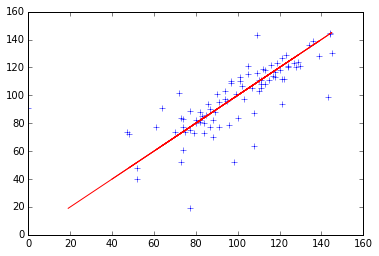

448.782098765 Covariancia
0.742437440239 Correlacao
156.411111111 Momento de inercia, OBS: no livro nao foi considerado o 2 multiplicando n


In [151]:
hx = 0
hy = 1

#----------------------------------#
V_o = []     # V original
V_s1 = dado_v # V solto - para o loop apenas
print dado_v

dx = shape(dado_v)[0]
dy = shape(dado_v)[1]

# loop dos x

for i in range (hx):
    V_o = np.delete(V_s1,np.s_[dx-1-i:], 1)
    V_s1 = V_o

# loop dos y

for j in range (hy):
    V_o = np.delete(V_s1,0,0)
    V_s1 = V_o
    

print ""
print V_o

#----------------------------------#
V_d = []     # V original
V_s2 = dado_v # V solto - para o loop apenas
print ""
print dado_v

# loop dos x

for i in range (hx):
    V_d = np.delete(V_s2,np.s_[:1], 1)
    V_s2 = V_d
    
# loop dos y
    
for j in range (hy):
    V_d = np.delete(V_s2,dy-1,0)
    V_s2 = V_d
    
print V_d

plt.plot(V_o,V_d,'+b')
plt.plot(V_d,V_d,'r')
plt.show()

#--------------------------------Estatisticas-----------------------------#
n = (shape(V_o)[0]) * (shape(V_o)[1])

vo = np.reshape(V_o,(1,n))
Vo = np.squeeze(vo)

vd = np.reshape(V_d,(1,n))
Vd = np.squeeze(vd)

mvo = np.mean(Vo)
mvd = np.mean(Vd)

sigvo = np.std(Vo)
sigvd = np.std(Vd)

rho1 = [] # Covariancia
lam1 = [] # Momento de Inercia

for i in range (len(Vd)):
    rho0 = (Vd[i]-mvd)*(Vo[i]-mvo)
    rho1.append(rho0)
    lam0 = ((Vd[i]-Vo[i])**2)
    lam1.append(lam0)

lam2 = sum(lam1)
lam3 = lam2/(2*n)
    
rho2 = sum(rho1)
Cuvo = rho2/(len(Vo))
print Cuvo,"Covariancia"
rho4 = Cuvo/(sigvo*sigvd)
print rho4,"Correlacao"
print lam3,"Momento de inercia, OBS: no livro nao foi considerado o 2 multiplicando n"